In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Zoo.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check the summary information of the dataset
print(data.info())

# Display basic statistics
print(data.describe())


  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3     1  
4     1  
<class '

In [3]:

print(data.columns)

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


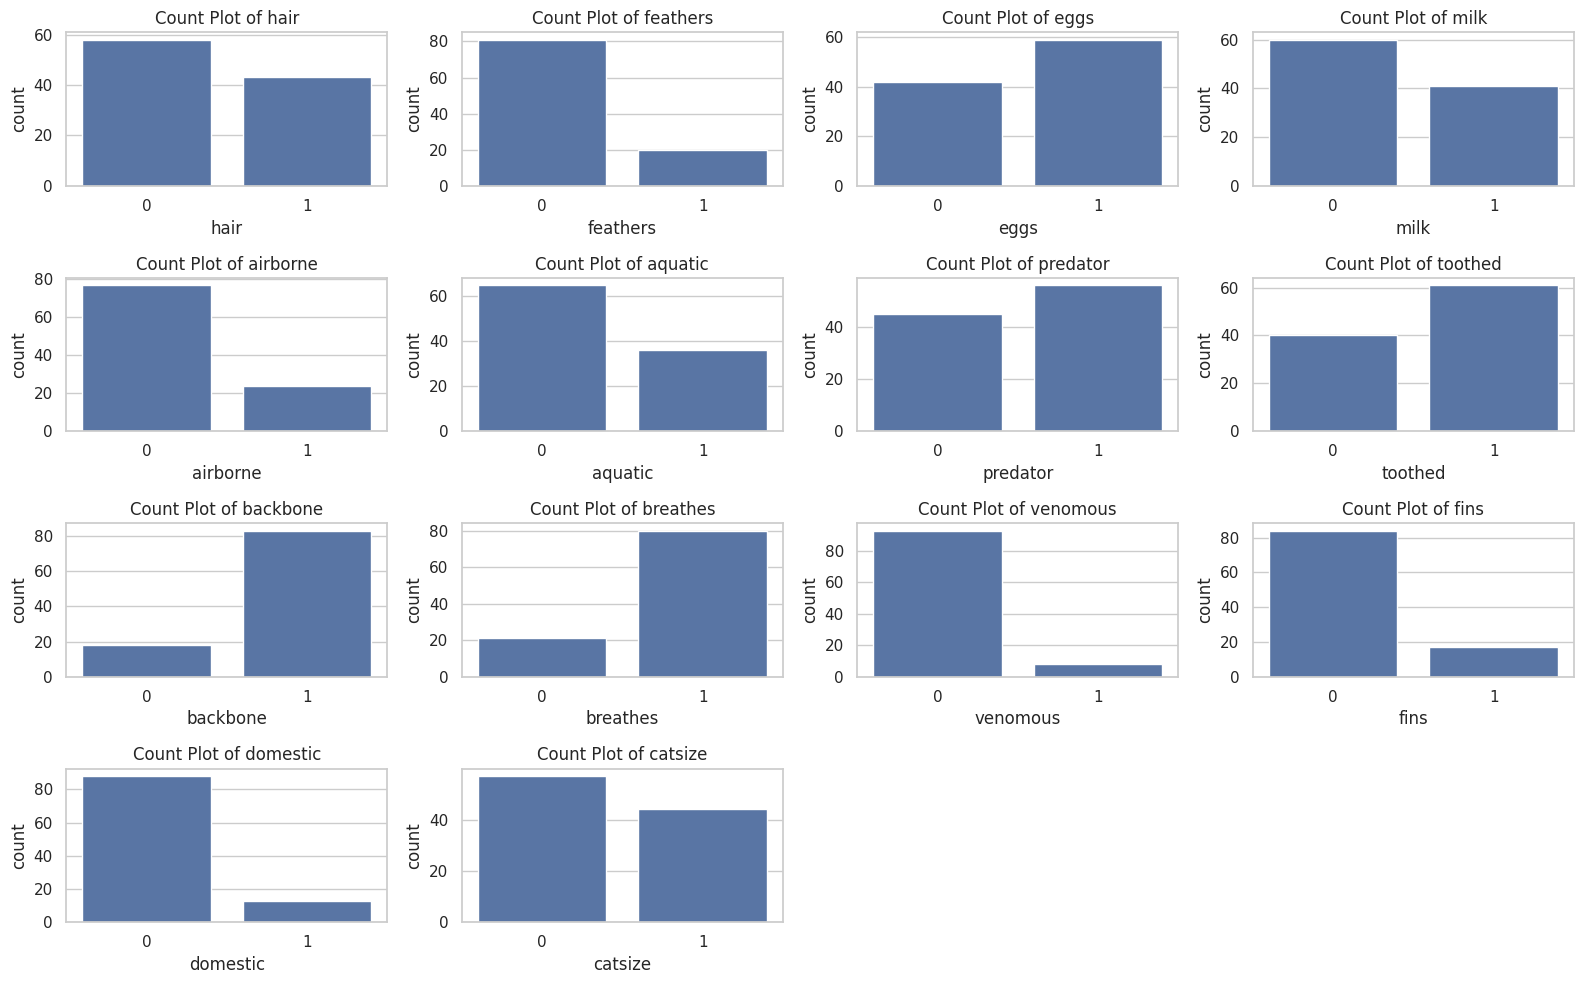

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of binary features (0 or 1)
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
                   'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
                   'domestic', 'catsize']

# Visualize binary feature distributions
plt.figure(figsize=(16, 10))
for i, feature in enumerate(binary_features):
    plt.subplot(4, 4, i+1)
    sns.countplot(data=data, x=feature)
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split

# 'type' will be our target variable, and we'll drop 'animal name'
X = data.drop(columns=['animal name', 'type'])
y = data['type']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set size: {X_train.shape}')
print(f'Testing set size: {X_test.shape}')


Training set size: (80, 16)
Testing set size: (21, 16)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 4.1: Initialize the KNN classifier
# Let's start by choosing K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Step 4.2: Fit the model on the training data
knn.fit(X_train, y_train)

# Step 4.3: Make predictions on the testing set
y_pred = knn.predict(X_test)

# Step 4.4: Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision, Recall, F1-Score (we use average='weighted' because it's a multiclass classification)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1 Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [8]:
# Tuning K (try different values of K)
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for K={k}: {accuracy:.2f}')


Accuracy for K=1: 1.00
Accuracy for K=2: 1.00
Accuracy for K=3: 0.95
Accuracy for K=4: 0.95
Accuracy for K=5: 0.90
Accuracy for K=6: 0.90
Accuracy for K=7: 0.86
Accuracy for K=8: 0.86
Accuracy for K=9: 0.86
Accuracy for K=10: 0.86


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


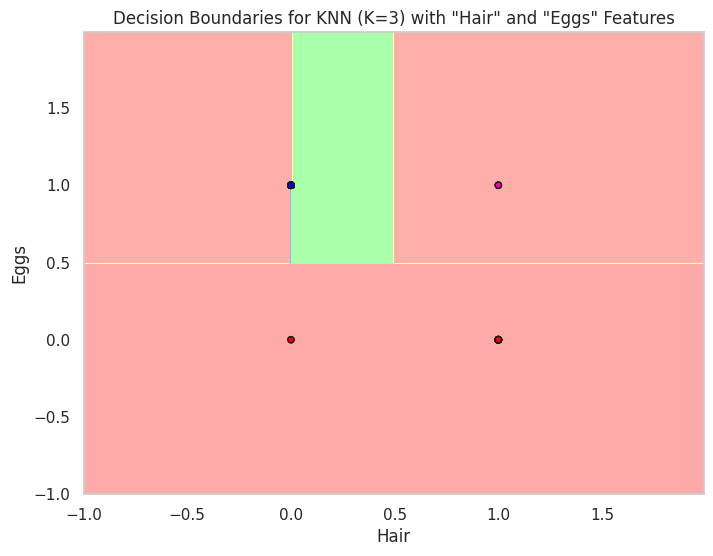

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features (for example, 'hair' and 'eggs')
X_train_subset = X_train[['hair', 'eggs']]
X_test_subset = X_test[['hair', 'eggs']]

# Fit the KNN classifier with the subset of features
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_subset, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00AA'])

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Hair')
plt.ylabel('Eggs')
plt.title(f'Decision Boundaries for KNN (K=3) with "Hair" and "Eggs" Features')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


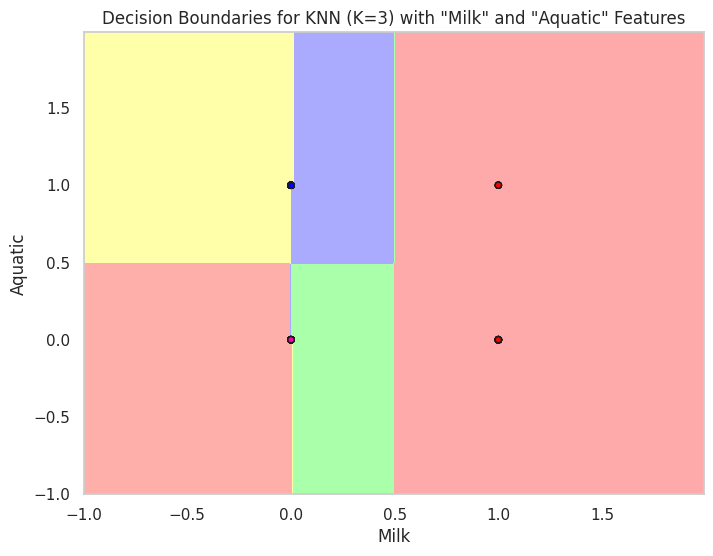

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select two features (for example, 'milk' and 'aquatic')
X_train_subset = X_train[['milk', 'aquatic']]
X_test_subset = X_test[['milk', 'aquatic']]

# Fit the KNN classifier with the subset of features
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust K if needed
knn.fit(X_train_subset, y_train)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_train_subset.iloc[:, 0].min() - 1, X_train_subset.iloc[:, 0].max() + 1
y_min, y_max = X_train_subset.iloc[:, 1].min() - 1, X_train_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a color map for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFAA', '#FFAFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00AA'])

# Plot the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train_subset.iloc[:, 0], X_train_subset.iloc[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlabel('Milk')
plt.ylabel('Aquatic')
plt.title(f'Decision Boundaries for KNN (K=3) with "Milk" and "Aquatic" Features')
plt.show()


Interview Questions

*1. Key Hyperparameters in KNN--

The K-Nearest Neighbors (KNN) algorithm has a few important hyperparameters that significantly impact its performance:

Number of Neighbors (K):
This is the most critical hyperparameter in KNN. It determines how many nearest neighbors will be considered when making a prediction. A smaller value of K makes the model more sensitive to noise (low bias, high variance), while a larger value smooths the predictions but may lead to underfitting (high bias, low variance).

Distance Metric:
KNN relies on a distance measure to identify the "nearest" neighbors. Common metrics include:

Euclidean Distance: The most commonly used metric for continuous data, it calculates the straight-line distance between two points.
Manhattan Distance: Also called L1 norm, it measures the distance between points along axes at right angles (i.e., the sum of absolute differences).
Minkowski Distance: A generalization of both Euclidean and Manhattan distances, controlled by a parameter p. When p=1, it becomes Manhattan distance; when p=2, it becomes Euclidean distance.
Chebyshev Distance: Measures the maximum absolute difference between two points.
Cosine Similarity: Measures the cosine of the angle between two vectors (used mainly in text mining or when magnitude doesn't matter, but direction does).
Weight Function:
KNN can use a uniform weight or weighted neighbors based on distance:

Uniform Weights: All neighbors contribute equally to the prediction.
Distance Weights: Closer neighbors contribute more to the prediction than those farther away.
Algorithm for Nearest Neighbor Search: KNN can use different algorithms to compute nearest neighbors:

Brute Force: Directly computes the distance between the query point and every other point.
Ball Tree/KD Tree: More efficient search structures for larger datasets, useful when the number of samples is large.
Leaf Size:
This parameter is relevant when using the ball tree or KD tree for faster nearest-neighbor searches. It defines the maximum number of points in each leaf node, which can affect the speed of the search and the construction of the tree.

*2. Distance Metrics Used in KNN--

Different distance metrics can be used depending on the type of data and the problem at hand:

Euclidean Distance:

Formula:
𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
(
𝑥
𝑖
−
𝑦
𝑖
)
2
d(x,y)=
i=1
∑
n
​
 (x
i
​
 −y
i
​
 )
2

​

This is the standard straight-line distance between two points in Euclidean space. It is best used when the magnitude of differences between features matters.
Manhattan Distance:

Formula:
𝑑
(
𝑥
,
𝑦
)
=
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)=
i=1
∑
n
​
 ∣x
i
​
 −y
i
​
 ∣
Also known as the L1 distance, it calculates the distance between points by summing the absolute differences. It is useful in scenarios where differences in individual features are more meaningful than the overall straight-line distance.
Minkowski Distance:

Formula:
𝑑
(
𝑥
,
𝑦
)
=
(
∑
𝑖
=
1
𝑛
∣
𝑥
𝑖
−
𝑦
𝑖
∣
𝑝
)
1
/
𝑝
d(x,y)=(
i=1
∑
n
​
 ∣x
i
​
 −y
i
​
 ∣
p
 )
1/p

It generalizes both Euclidean (when
𝑝
=
2
p=2) and Manhattan distance (when
𝑝
=
1
p=1). It offers flexibility when comparing data and can be adjusted depending on the nature of the problem.
Chebyshev Distance:

Formula:
𝑑
(
𝑥
,
𝑦
)
=
max
⁡
𝑖
∣
𝑥
𝑖
−
𝑦
𝑖
∣
d(x,y)=
i
max
​
 ∣x
i
​
 −y
i
​
 ∣
It measures the greatest absolute difference between feature values. This metric is less commonly used but can be useful when considering the worst-case scenario.
Cosine Similarity:

Formula:
Cosine Similarity
=
𝑥
⋅
𝑦
∥
𝑥
∥
∥
𝑦
∥
Cosine Similarity=
∥x∥∥y∥
x⋅y
​

Cosine similarity is different from other distance metrics in that it measures the angle between two vectors rather than the actual distance. It's often used in text and document classification, where the magnitude of the vector (i.e., the length of the document) is less important than the direction (i.e., the context or structure of the document).
Hamming Distance:

Used for categorical or binary data, it measures the number of positions at which the corresponding elements are different (useful for text or binary features).
Choosing the Right Distance Metric
Euclidean Distance: Works best for continuous variables and when the relationship between features is linear.
Manhattan Distance: Useful when you expect features to contribute independently, without any geometric relationship.
Minkowski Distance: Offers flexibility; can be tuned based on problem requirements.
Cosine Similarity: Works best for high-dimensional sparse data, like text or document similarity.
Hamming Distance: Used for categorical data, especially in text mining or DNA sequence analysis.
The right distance metric depends on the dataset and problem characteristics. Experimentation is often necessary to find the best metric.






